In [1]:
#Disable autosave
%autosave 0

Autosave disabled


In [2]:
#Imports.. the new one is scipy!
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

Let's define a uniform distribution for the roll of a single die.

In [3]:
#Create distribution object
dice_rolls = stats.randint(1, 7)

We can obtain random values from the distribution using the .rvs() method.

In [4]:
#Return some random values
dice_rolls.rvs(10)

array([6, 1, 4, 3, 4, 2, 5, 2, 1, 2])

Let's return a bunch of numbers and visualize them!

In [5]:
#Save 10k values to a variable
vals = dice_rolls.rvs(10_000)

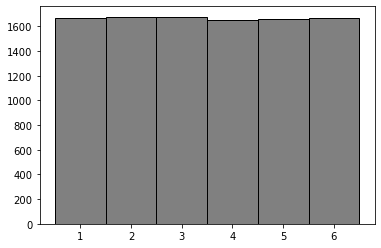

In [6]:
#Plot! Notice it doesn't take much work to greatly improve a visual
plt.hist(vals, bins = range(1,8), align = 'left', color = 'gray', ec = 'black')
plt.show()

The probability mass function accepts a value and returns the probability of getting that specified value for discrete distributions.

The probability density function performs the same function for continuous distributions.

In [7]:
#What is the probability any given roll is a 3?
dice_rolls.pmf(3)

0.16666666666666666

In [8]:
#What about a 5?
dice_rolls.pmf(5)

0.16666666666666666

The cumulative density function accepts a value and returns the probability of getting a value up to and including the specified value.

The percent point function accepts a proportion and returns the value under which that proportion of values is found.

In [9]:
#What is the chance we roll anything up to and including 3?
dice_rolls.cdf(3)

0.5

In [10]:
#What about 6, our biggest number?
dice_rolls.cdf(6)

1.0

In [11]:
#What value serves as the cutoff for the bottom 50% of values?
dice_rolls.ppf(0.5)

3.0

In [12]:
#What about the bottom 2/3rds of values?
dice_rolls.ppf(2/3)

4.0

In [13]:
#What proportion of values are present up to and including 4?
dice_rolls.cdf(4)

0.6666666666666666

The survival function accepts a value and returns the probability of getting a value greater than the one specified.

The inverse survival function accepts a proportion and returns the value above which that proportion of values is found.

In [14]:
#What proportion of values are greater than 4?
dice_rolls.sf(4)

0.33333333333333337

In [15]:
#Showing the survival function and cumulative density function of the same number sum to 1.
dice_rolls.cdf(4)

0.6666666666666666

In [16]:
#Over what value are 2/3rds of my values found?
dice_rolls.isf(2/3)

2.0

In [17]:
#Showing how isf and sf interact.
dice_rolls.sf(2)

0.6666666666666667

A binomial (think binary) distribution assumes there are two possible outcomes: success and failure. We create a binomial distribution with the .binom() method, where we specify the number of trials and the probability of success. We can use the familiar methods on these distributions, too!

In [18]:
#Create binomial distribution
attendance = stats.binom(8, 0.95)
attendance

In [19]:
#Odds everyone shows up?
attendance.pmf(8)

0.6634204312890623

In [20]:
#Odds more than 5 people show up.
attendance.sf(5)

0.9942117820703125

In [21]:
#Random values works on this distribution too!
attendance.rvs(10)

array([8, 7, 7, 7, 8, 8, 8, 8, 8, 7])

In [22]:
#List comprehension to generate y values for plotting
y = [attendance.pmf(i) for i in range(0, 9)]
y

[3.906250000000028e-11,
 5.937500000000035e-09,
 3.948437500000023e-07,
 1.5004062500000061e-05,
 0.00035634648437500127,
 0.005416466562500013,
 0.05145643234375009,
 0.27933491843750013,
 0.6634204312890623]

<BarContainer object of 9 artists>

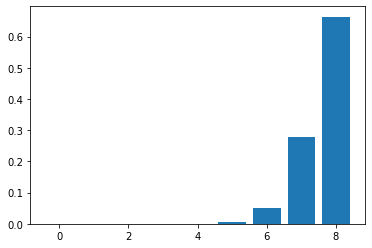

In [23]:
#Plot of frequency of values
plt.bar(x = range(0, 9), height = y)

Normal distributions are for continuous variables. We can create a normal distribution with the .norm() method, where we specify the mean and standard deviation for the distribution.

In [24]:
#Define normal distribution
monthly_sales = stats.norm(23_000, 2_500)

In [25]:
#Odds of exactly 24k? Not high with continuous distribution
monthly_sales.pdf(24_000)

0.00014730805612132934

In [26]:
#Odds we make more than 25k in a month?
monthly_sales.sf(25_000)

0.2118553985833967

In [27]:
#How much would we have to make to be in the top 10% of values?
monthly_sales.isf(0.10)

26203.878913861503

In [28]:
#What is the cutoff for the bottom 10% of values?
monthly_sales.ppf(0.10)

19796.121086138497

Poisson distributions measure how many events occur over a specific time period. We create a poisson distribution with the .poisson() method, where we only have to specify the expected value.

In [29]:
#Define poisson distribution
drank_coffee = stats.poisson(15)

In [30]:
#Odds 20+ people drink coffee on a given day.
drank_coffee.sf(19)

0.12478121503252496

In [31]:
#Odds exactly 15 people drink coffee.
drank_coffee.pmf(15)

0.1024358666645339

In [32]:
#List comprehension to generate y values
y_poisson = [drank_coffee.pmf(i) for i in range(0, 26)]
y_poisson

[3.059023205018258e-07,
 4.588534807527389e-06,
 3.4414011056455366e-05,
 0.00017207005528227702,
 0.000645262707308539,
 0.0019357881219256158,
 0.004839470304814035,
 0.010370293510315794,
 0.019444300331842114,
 0.03240716721973691,
 0.04861075082960534,
 0.06628738749491639,
 0.08285923436864541,
 0.09560680888689863,
 0.1024358666645339,
 0.1024358666645339,
 0.09603362499800054,
 0.08473555146882411,
 0.07061295955735365,
 0.055747073334752824,
 0.04181030500106466,
 0.02986450357218907,
 0.02036216152649248,
 0.013279670560755972,
 0.00829979410047246,
 0.004979876460283485]

<BarContainer object of 26 artists>

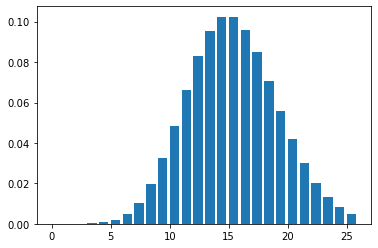

In [33]:
#Plot
plt.bar(x = range(0, 26), height = y_poisson, align = 'edge')